# Importación y lectura del dataset

Dentro de esta sección hicimos la lectura de los datos y reducimos la cantidad de variables generando los promedios como valores representativos de las variables generales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from gtda.time_series import SingleTakensEmbedding
from gtda.plotting import plot_point_cloud

df = pd.read_csv('datos_topo.csv', index_col = 'Unnamed: 0')
df.tail()

Flow  flow_dates  tas_1  pr_1  tas_2  pr_2  tas_3  pr_3  tas_4  \
21169  4.281342  2015-12-23   -1.6   2.6   -0.8   2.9    0.7   2.5    0.2   
21170  3.734578  2015-12-24   -1.8   1.7   -0.8   1.4    0.1   0.5   -0.1   
21171  1.921873  2015-12-25   -0.2   2.1    0.6   2.2    3.4   4.0    1.7   
21172  5.067260  2015-12-26   -4.1   0.0   -3.0   0.0    0.7   0.0   -1.9   
21173  2.177040  2015-12-27  -12.5   2.2  -11.7   0.1   -8.6   1.1  -11.0   

       pr_4  ...  pr_5  tas_6  pr_6  tas_7  pr_7  tas_8  pr_8  tas_9  pr_9  \
21169   2.8  ...   2.8    0.6   2.7    0.7   1.5    1.1   1.1    1.5   2.6   
21170   1.2  ...   0.9    0.3   0.0    0.4   1.2    0.5   0.0    1.0   0.0   
21171   3.0  ...   2.8    2.9   2.1    2.2   3.3    3.4   1.6    4.4   0.6   
21172   0.0  ...   0.0   -0.4   0.0   -1.3   0.0    0.5   0.0    1.7   0.0   
21173   1.5  ...   0.1   -9.2   0.0   -9.7   0.0   -8.4   0.0   -7.5   0.0   

        obs_dates  
21169  2015-12-23  
21170  2015-12-24  
21171  2015-12-25  
21172  2015-12-26  
21173  2015-12-27  

[5 rows x 21 columns]

### Se crean las variables de Precipitación, Temperatura y Flujo

Esto nos ayudará a reducir la cantidad de variables y hacer mejor los análisis.

In [2]:
temperaturas = df.filter(['tas_1', 'tas_2', 'tas_3', 'tas_4', 'tas_5', 'tas_6', 'tas_7', 'tas_8', 'tas_9'], axis = 1)
df['Temps'] = round(temperaturas.mean(axis = 1),3)
precipitaciones = df.filter(['pr_1', 'pr_2', 'pr_3', 'pr_4', 'pr_5', 'pr_6','pr_7','pr_8','pr_9'], axis = 1)
df['Pr'] = round(precipitaciones.mean(axis = 1),3)

df = df.filter(['Flow','obs_dates','Temps','Pr'], axis = 1)

In [3]:
df.tail()

Flow   obs_dates  Temps     Pr
21169  4.281342  2015-12-23  0.256  2.389
21170  3.734578  2015-12-24 -0.067  0.767
21171  1.921873  2015-12-25  2.189  2.411
21172  5.067260  2015-12-26 -1.100  0.000
21173  2.177040  2015-12-27 -9.944  0.556

In [4]:
df. rename(columns = {'obs_dates':'Date'}, inplace = True)
df.head()

Flow        Date   Temps      Pr
0  1.723781  1958-01-04 -12.656   0.000
1  0.960882  1958-01-05  -7.722   2.589
2  0.001000  1958-01-06  -8.089  12.767
3  0.001000  1958-01-07 -10.122   6.878
4  0.316796  1958-01-08 -17.456   3.411

# Agrupaciones

In [5]:
df['Date'] = pd.to_datetime(df['Date'])  

In [6]:
df_m = df.resample('M', on='Date').mean()
df_m.shape

(696, 3)

In [7]:
df_m.reset_index(drop=False, inplace=True)
df_m

Date       Flow      Temps        Pr
0   1958-01-31   0.629797  -9.278929  1.961500
1   1958-02-28   0.587594 -12.514607  1.183643
2   1958-03-31   0.568484  -9.787065  0.122613
3   1958-04-30   4.465059  -1.451500  1.738533
4   1958-05-31  16.584016   3.987839  2.387806
..         ...        ...        ...       ...
691 2015-08-31  11.422987  11.614258  3.755484
692 2015-09-30  28.201833   8.135533  6.864033
693 2015-10-31   2.733366   3.146645  0.336548
694 2015-11-30   3.136748  -0.575233  1.947133
695 2015-12-31   2.886292  -1.446037  1.465481

[696 rows x 4 columns]

In [8]:
años = np.array_split(df_m, 58)
años[0]

Date       Flow      Temps        Pr
0  1958-01-31   0.629797  -9.278929  1.961500
1  1958-02-28   0.587594 -12.514607  1.183643
2  1958-03-31   0.568484  -9.787065  0.122613
3  1958-04-30   4.465059  -1.451500  1.738533
4  1958-05-31  16.584016   3.987839  2.387806
5  1958-06-30   8.435912  10.434567  2.471133
6  1958-07-31   7.757552  12.778935  4.504613
7  1958-08-31   9.033237  10.330839  2.992161
8  1958-09-30  14.946557   8.468133  3.998900
9  1958-10-31  19.424091   3.952677  4.441226
10 1958-11-30   5.368111  -0.738867  1.966600
11 1958-12-31   0.896493  -8.487097  1.809323

In [9]:
df_5 = pd.concat(años[50:55],)
df_5.reset_index(drop = True, inplace = True)
df_5

Date       Flow      Temps        Pr
0  2008-01-31   1.700089  -4.618677  4.058774
1  2008-02-29   2.032757  -2.497724  1.845172
2  2008-03-31   2.716426  -4.672774  3.398903
3  2008-04-30  13.766507   1.391800  2.147000
4  2008-05-31  40.873260   7.336581  1.743355
5  2008-06-30   6.371427  11.229267  2.044100
6  2008-07-31   9.996928  14.203871  4.390645
7  2008-08-31   8.002153  11.306097  3.126548
8  2008-09-30   6.045399   6.920767  1.962567
9  2008-10-31   5.220447   2.934742  2.261742
10 2008-11-30   4.071268  -1.891967  2.094767
11 2008-12-31   1.556289  -7.363387  0.948323
12 2009-01-31   1.086840  -6.476710  2.324710
13 2009-02-28   0.946643  -9.119071  1.715071
14 2009-03-31   1.381884  -2.836613  1.984258
15 2009-04-30  22.082372   4.178867  1.095600
16 2009-05-31  12.376193   7.074226  1.860161
17 2009-06-30   2.496764  11.242967  1.417033
18 2009-07-31  10.365686  13.297065  5.370323
19 2009-08-31  14.331654  11.669129  4.550194
20 2009-09-30   5.302184   8.738900  1.017000
21 2009-10-31   2.000802  -0.304194  1.561258
22 2009-11-30   8.274052  -2.660700  4.852533
23 2009-12-31   2.900508 -10.565871  2.197484
24 2010-01-31   1.369521 -13.975710  0.869161
25 2010-02-28   0.858726 -11.203679  1.054786
26 2010-03-31   0.985878  -2.085613  1.073484
27 2010-04-30   6.065184   0.983633  1.033000
28 2010-05-31  29.852545   5.602871  1.949419
29 2010-06-30   7.358171  11.212567  1.920733
30 2010-07-31   3.825729  13.112613  3.182065
31 2010-08-31  14.515403  11.553839  5.707581
32 2010-09-30   9.008459   6.178533  2.317733
33 2010-10-31  13.453839   1.061613  2.963097
34 2010-11-30   2.047564  -6.860333  0.767067
35 2010-12-31   0.993145 -13.823387  0.442258
36 2011-01-31   0.701691  -6.479677  1.499226
37 2011-02-28   0.693508  -8.290107  1.587964
38 2011-03-31   1.284112  -2.676000  0.423968
39 2011-04-30  13.313877   5.584867  0.751500
40 2011-05-31   5.504576   6.717903  2.643774
41 2011-06-30  18.729078  11.828533  6.607400
42 2011-07-31  19.584910  13.451548  6.360710
43 2011-08-31  18.653087  11.809355  6.590645
44 2011-09-30  22.961667   8.708900  5.423000
45 2011-10-31   4.441141   3.791774  1.615645
46 2011-11-30   4.342316   0.946633  0.842567
47 2011-12-31   1.758882  -3.747226  2.088548
48 2012-01-31   1.131271  -7.214645  2.048387
49 2012-02-29   1.264871  -5.624172  0.432172
50 2012-03-31   8.829101   2.567774  0.445484
51 2012-04-30   8.875869   0.051467  3.088167
52 2012-05-31  16.898625   7.504258  2.369581
53 2012-06-30  10.370218   9.161500  3.373667
54 2012-07-31  12.532998  12.258032  4.362387
55 2012-08-31   9.064758  11.839065  4.786419
56 2012-09-30   4.435149   6.949333  1.587800
57 2012-10-31   7.192489   0.934000  2.559129
58 2012-11-30   9.835025  -0.923300  3.432967
59 2012-12-31   2.158055 -11.249839  2.163097

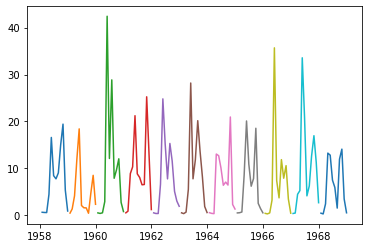

In [10]:
plt.figure()
for i in range(11):
    plt.plot(años[i]['Date'],años[i]['Flow'])
    # Show/save figure as desired. 
plt.show()

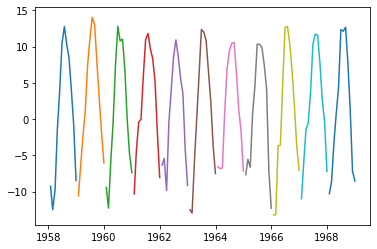

In [11]:
plt.figure()
for i in range(11):  
    plt.plot(años[i]['Date'],años[i]['Temps'])
    # Show/save figure as desired.
plt.show()

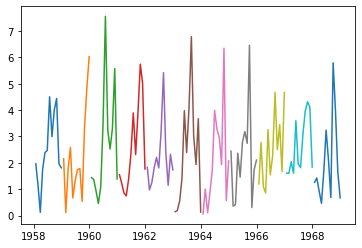

In [12]:
plt.figure()
for i in range(11):
    plt.plot(años[i]['Date'],años[i]['Pr'])
    # Show/save figure as desired.
plt.show()

In [13]:
df_m['Month'] = df_m['Date'].dt.month
df_m

Date       Flow      Temps        Pr  Month
0   1958-01-31   0.629797  -9.278929  1.961500      1
1   1958-02-28   0.587594 -12.514607  1.183643      2
2   1958-03-31   0.568484  -9.787065  0.122613      3
3   1958-04-30   4.465059  -1.451500  1.738533      4
4   1958-05-31  16.584016   3.987839  2.387806      5
..         ...        ...        ...       ...    ...
691 2015-08-31  11.422987  11.614258  3.755484      8
692 2015-09-30  28.201833   8.135533  6.864033      9
693 2015-10-31   2.733366   3.146645  0.336548     10
694 2015-11-30   3.136748  -0.575233  1.947133     11
695 2015-12-31   2.886292  -1.446037  1.465481     12

[696 rows x 5 columns]

In [14]:
df_invierno = df_m.loc[df_m['Month'].isin([12,1,2])]
df_primavera = df_m.loc[df_m['Month'].isin([3,4,5])]
df_verano = df_m.loc[df_m['Month'].isin([6,7,8])]
df_otoño = df_m.loc[df_m['Month'].isin([9,10,11])]

In [15]:
df_invierno

Date      Flow      Temps        Pr  Month
0   1958-01-31  0.629797  -9.278929  1.961500      1
1   1958-02-28  0.587594 -12.514607  1.183643      2
11  1958-12-31  0.896493  -8.487097  1.809323     12
12  1959-01-31  0.456331 -10.593226  2.154484      1
13  1959-02-28  1.333810  -6.683750  0.109893      2
..         ...       ...        ...       ...    ...
673 2014-02-28  2.169692  -2.790000  4.175786      2
683 2014-12-31  2.241717  -4.807871  0.442968     12
684 2015-01-31  1.758843  -3.869871  2.447323      1
685 2015-02-28  1.341762  -2.796464  1.046071      2
695 2015-12-31  2.886292  -1.446037  1.465481     12

[174 rows x 5 columns]

In [16]:
# flow = df_invierno['Temps']
flow = df_5['Flow']
fecha = df_5['Date']
fig = go.Figure(data=go.Scatter(x = fecha, y = flow))
fig.update_layout(xaxis_title="Fecha", yaxis_title="Temperatura")
fig.show()

In [17]:
df_20 = pd.concat(años[53:58],)
df_20.reset_index(drop = True, inplace = True)

In [18]:
flow = df_20['Pr']
fecha = df_20['Date']
fig = go.Figure(data=go.Scatter(x = fecha, y = flow))
fig.update_layout(xaxis_title="Fecha", yaxis_title="Precipitación")
fig.show()

In [19]:
flow = df_20['Flow']
fecha = df_20['Date']
fig = go.Figure(data=go.Scatter(x = fecha, y = flow))
fig.update_layout(xaxis_title="Fecha", yaxis_title="Flow")
fig.show()
flow.shape

(60,)

In [20]:
df_20.tail()

Date       Flow      Temps        Pr
55 2015-08-31  11.422987  11.614258  3.755484
56 2015-09-30  28.201833   8.135533  6.864033
57 2015-10-31   2.733366   3.146645  0.336548
58 2015-11-30   3.136748  -0.575233  1.947133
59 2015-12-31   2.886292  -1.446037  1.465481

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_f = pd.concat(años[53:58],)
df_f.reset_index(drop = True, inplace = True)
result=seasonal_decompose(df_f['Flow'], model='multiplicable', period=12)

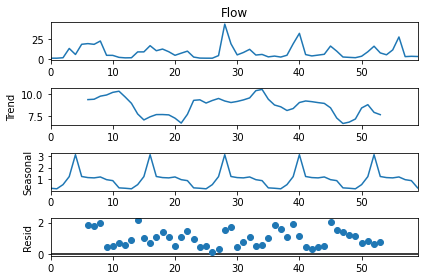

In [22]:
result.plot()
plt.show()

# K-Means

In [23]:
dfk = df[['Pr','Temps']]

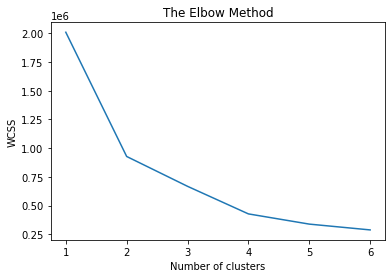

In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dfk)
    wcss.append(kmeans.inertia_) #WCSS = within cluster sum of squares

plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [25]:
kmeans = KMeans(n_clusters=4).fit(dfk)

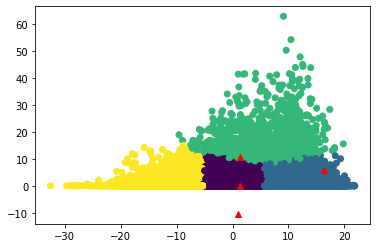

In [26]:
plt.scatter(dfk['Temps'],dfk['Pr'],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.show()

# Periodicidad

In [27]:
def fit_embedder(embedder: SingleTakensEmbedding, y: np.ndarray, verbose: bool=True) -> np.ndarray:
    """Fits a Takens embedder and displays optimal search parameters."""
    y_embedded = embedder.fit_transform(y)

    if verbose:
        print(f"Shape of embedded time series: {y_embedded.shape}")
        print(
            f"Optimal embedding dimension is {embedder.dimension_} and time delay is {embedder.time_delay_}"
        )

    return y_embedded

In [28]:
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

mov_avg = moving_average(df['Temps'],60)
mov_avg_f = moving_average(df['Flow'],60)
mov_avg_Pr = moving_average(df['Pr'],60)

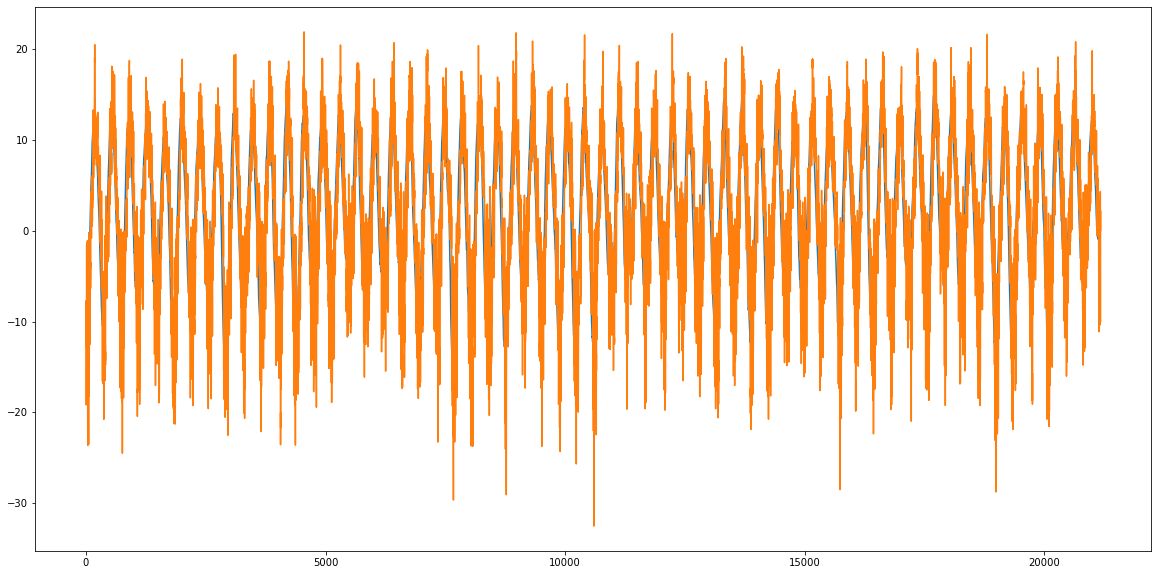

In [29]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(mov_avg)
plt.plot(df['Temps'])
plt.show()

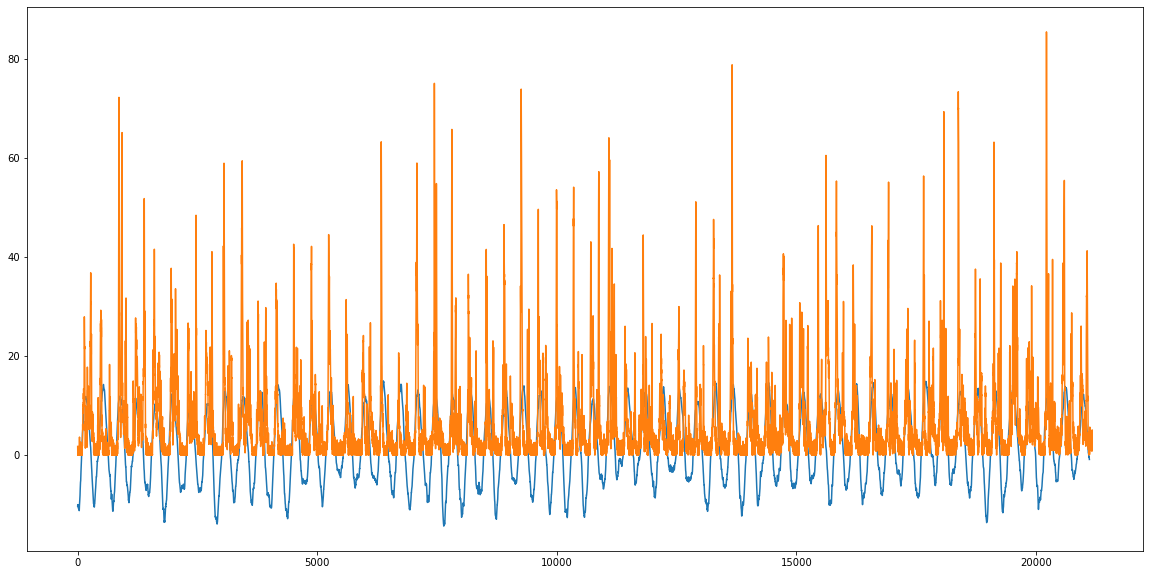

In [30]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(mov_avg)
plt.plot(df['Flow'])
plt.show()

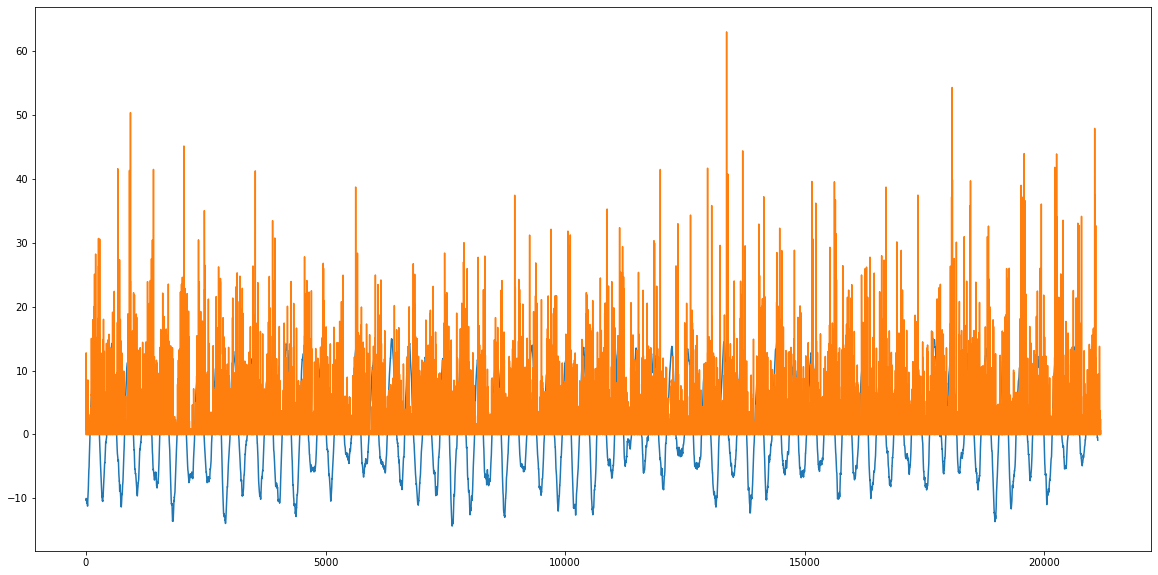

In [31]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(mov_avg)
plt.plot(df['Pr'])
plt.show()

In [32]:
embedding_dimension_periodic = 3
embedding_time_delay_periodic = 8
stride = 60

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

mov_avg_Pr_embedded= embedder_periodic.fit_transform(mov_avg_Pr)

plot_point_cloud(mov_avg_Pr_embedded)

In [33]:
mov_avg_Pr_embedded = mov_avg_Pr_embedded[None, :, :]

from gtda.homology import VietorisRipsPersistence

# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

periodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for periodic signal")
periodic_persistence.fit_transform_plot(mov_avg_Pr_embedded)

Persistence diagram for periodic signal


array([[[0.        , 0.03111676, 0.        ],
        [0.        , 0.03430051, 0.        ],
        [0.        , 0.04216096, 0.        ],
        ...,
        [0.3352254 , 0.34129506, 2.        ],
        [0.33425003, 0.34129506, 2.        ],
        [0.20523214, 0.21580794, 2.        ]]])

In [34]:
embedding_dimension_periodic = 3
embedding_time_delay_periodic = 8
stride = 60

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

mov_avg_f_embedded= embedder_periodic.fit_transform(mov_avg_f)

plot_point_cloud(mov_avg_f_embedded)

In [35]:
mov_avg_f_embedded = mov_avg_f_embedded[None, :, :]


# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

periodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for periodic signal")
periodic_persistence.fit_transform_plot(mov_avg_f_embedded)


Persistence diagram for periodic signal


array([[[0.        , 0.0074274 , 0.        ],
        [0.        , 0.01632013, 0.        ],
        [0.        , 0.02257509, 0.        ],
        ...,
        [0.10961132, 0.11280227, 1.        ],
        [0.08500651, 0.08533721, 1.        ],
        [0.        , 0.        , 2.        ]]])

In [36]:
embedding_dimension_periodic = 3
embedding_time_delay_periodic = 8
stride = 60

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

mov_avg_embedded= embedder_periodic.fit_transform(mov_avg)

plot_point_cloud(mov_avg_embedded)

In [37]:
mov_avg_embedded= mov_avg_embedded[None, :, :]


# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

periodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for periodic signal")
periodic_persistence.fit_transform_plot(mov_avg_embedded)


Persistence diagram for periodic signal


array([[[0.        , 0.08605302, 0.        ],
        [0.        , 0.08747358, 0.        ],
        [0.        , 0.08973642, 0.        ],
        ...,
        [0.49961635, 0.75092411, 1.        ],
        [0.45911756, 0.48180506, 1.        ],
        [0.        , 0.        , 2.        ]]])

## Periodicidad (Decadas)

In [38]:
df_1d = pd.concat(años[0:11],)
df_1d.reset_index(drop = True, inplace = True)

In [39]:
df_2d = pd.concat(años[47:58],)
df_2d.reset_index(drop = True, inplace = True)

In [40]:
#Primera decada

flow_d1 = df_1d['Flow']
pr_d1 = df_1d['Pr']
temps_d1 = df_1d['Temps']

#Segunda decada

flow_d2 = df_2d['Flow']
pr_d2 = df_2d['Pr']
temps_d2 = df_2d['Temps']

In [41]:
embedding_dimension_periodic = 3
embedding_time_delay_periodic = 8
stride = 2

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

In [42]:
flowd1_embedded = embedder_periodic.fit_transform(flow_d1)
prd1_embedded = embedder_periodic.fit_transform(pr_d1)
tempsd1_embedded = embedder_periodic.fit_transform(temps_d1)

In [43]:
flowd2_embedded = embedder_periodic.fit_transform(flow_d2)
prd2_embedded = embedder_periodic.fit_transform(pr_d2)
tempsd2_embedded = embedder_periodic.fit_transform(temps_d2)

In [44]:
plot_point_cloud(flowd1_embedded)

In [45]:
plot_point_cloud(flowd2_embedded)

In [46]:
plot_point_cloud(prd1_embedded)

In [47]:
plot_point_cloud(prd2_embedded)

In [48]:
plot_point_cloud(tempsd1_embedded)

In [49]:
plot_point_cloud(tempsd2_embedded)

# Diagramas persistencia

In [50]:
tempsd1_embedded = tempsd1_embedded[None, :, :]
tempsd2_embedded = tempsd2_embedded[None, :, :]

prd2_embedded = prd2_embedded[None, :, :]
prd1_embedded = prd1_embedded[None, :, :]

flowd2_embedded = flowd2_embedded[None, :, :]
flowd1_embedded = flowd1_embedded[None, :, :]

In [51]:
from gtda.homology import VietorisRipsPersistence

# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

periodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for periodic signal")
periodic_persistence.fit_transform_plot(flowd1_embedded)

Persistence diagram for periodic signal


array([[[0.        , 0.54065204, 0.        ],
        [0.        , 0.77788961, 0.        ],
        [0.        , 1.08862257, 0.        ],
        [0.        , 1.59442067, 0.        ],
        [0.        , 1.86309206, 0.        ],
        [0.        , 1.87481999, 0.        ],
        [0.        , 1.88874853, 0.        ],
        [0.        , 1.89038718, 0.        ],
        [0.        , 1.94059622, 0.        ],
        [0.        , 2.02534866, 0.        ],
        [0.        , 2.06105042, 0.        ],
        [0.        , 2.06422448, 0.        ],
        [0.        , 2.07627058, 0.        ],
        [0.        , 2.14491725, 0.        ],
        [0.        , 2.20041919, 0.        ],
        [0.        , 2.36483288, 0.        ],
        [0.        , 2.45128083, 0.        ],
        [0.        , 2.45566249, 0.        ],
        [0.        , 2.51072335, 0.        ],
        [0.        , 2.583323  , 0.        ],
        [0.        , 2.58720231, 0.        ],
        [0.        , 2.59865236, 0

In [52]:
periodic_persistence.fit_transform_plot(flowd2_embedded)

array([[[0.        , 0.89754218, 0.        ],
        [0.        , 0.98057091, 0.        ],
        [0.        , 1.26418865, 0.        ],
        [0.        , 1.26955974, 0.        ],
        [0.        , 1.28877056, 0.        ],
        [0.        , 1.29755425, 0.        ],
        [0.        , 1.30306232, 0.        ],
        [0.        , 1.33535266, 0.        ],
        [0.        , 1.45605159, 0.        ],
        [0.        , 1.49420011, 0.        ],
        [0.        , 1.82863712, 0.        ],
        [0.        , 1.99141705, 0.        ],
        [0.        , 2.01869845, 0.        ],
        [0.        , 2.03417969, 0.        ],
        [0.        , 2.18720794, 0.        ],
        [0.        , 2.20688128, 0.        ],
        [0.        , 2.27486181, 0.        ],
        [0.        , 2.34348273, 0.        ],
        [0.        , 2.34549689, 0.        ],
        [0.        , 2.37271476, 0.        ],
        [0.        , 2.39211607, 0.        ],
        [0.        , 2.57490134, 0

In [53]:
periodic_persistence.fit_transform_plot(prd1_embedded)

array([[[0.        , 0.31072336, 0.        ],
        [0.        , 0.51602167, 0.        ],
        [0.        , 0.57114041, 0.        ],
        [0.        , 0.57895082, 0.        ],
        [0.        , 0.57922673, 0.        ],
        [0.        , 0.59942663, 0.        ],
        [0.        , 0.6074456 , 0.        ],
        [0.        , 0.608311  , 0.        ],
        [0.        , 0.61575389, 0.        ],
        [0.        , 0.73214692, 0.        ],
        [0.        , 0.74731803, 0.        ],
        [0.        , 0.78503299, 0.        ],
        [0.        , 0.79584545, 0.        ],
        [0.        , 0.82784146, 0.        ],
        [0.        , 0.84290349, 0.        ],
        [0.        , 0.84667903, 0.        ],
        [0.        , 0.90021014, 0.        ],
        [0.        , 0.9042387 , 0.        ],
        [0.        , 0.91721076, 0.        ],
        [0.        , 0.93315864, 0.        ],
        [0.        , 0.93455863, 0.        ],
        [0.        , 0.9923439 , 0

In [54]:
periodic_persistence.fit_transform_plot(prd2_embedded)

array([[[0.        , 0.18529305, 0.        ],
        [0.        , 0.27400872, 0.        ],
        [0.        , 0.34858084, 0.        ],
        [0.        , 0.36890221, 0.        ],
        [0.        , 0.38574177, 0.        ],
        [0.        , 0.40842387, 0.        ],
        [0.        , 0.47551194, 0.        ],
        [0.        , 0.49063626, 0.        ],
        [0.        , 0.54123932, 0.        ],
        [0.        , 0.54194778, 0.        ],
        [0.        , 0.54389918, 0.        ],
        [0.        , 0.62666494, 0.        ],
        [0.        , 0.63772416, 0.        ],
        [0.        , 0.69291759, 0.        ],
        [0.        , 0.71578515, 0.        ],
        [0.        , 0.72015917, 0.        ],
        [0.        , 0.72352588, 0.        ],
        [0.        , 0.7622295 , 0.        ],
        [0.        , 0.77691019, 0.        ],
        [0.        , 0.78193581, 0.        ],
        [0.        , 0.8054744 , 0.        ],
        [0.        , 0.80750686, 0

In [55]:
periodic_persistence.fit_transform_plot(tempsd1_embedded)

array([[[ 0.        ,  0.64960837,  0.        ],
        [ 0.        ,  0.77339792,  0.        ],
        [ 0.        ,  0.96153551,  0.        ],
        [ 0.        ,  1.01722789,  0.        ],
        [ 0.        ,  1.03534663,  0.        ],
        [ 0.        ,  1.0970155 ,  0.        ],
        [ 0.        ,  1.11396825,  0.        ],
        [ 0.        ,  1.15142441,  0.        ],
        [ 0.        ,  1.24269867,  0.        ],
        [ 0.        ,  1.25195026,  0.        ],
        [ 0.        ,  1.26850951,  0.        ],
        [ 0.        ,  1.27451754,  0.        ],
        [ 0.        ,  1.27484763,  0.        ],
        [ 0.        ,  1.34043562,  0.        ],
        [ 0.        ,  1.38431334,  0.        ],
        [ 0.        ,  1.39235604,  0.        ],
        [ 0.        ,  1.41967046,  0.        ],
        [ 0.        ,  1.57298958,  0.        ],
        [ 0.        ,  1.6128937 ,  0.        ],
        [ 0.        ,  1.61399031,  0.        ],
        [ 0.        

In [56]:
periodic_persistence.fit_transform_plot(tempsd2_embedded)

array([[[ 0.        ,  0.62074178,  0.        ],
        [ 0.        ,  0.9541589 ,  0.        ],
        [ 0.        ,  1.01209092,  0.        ],
        [ 0.        ,  1.33626497,  0.        ],
        [ 0.        ,  1.7401185 ,  0.        ],
        [ 0.        ,  1.74510193,  0.        ],
        [ 0.        ,  1.76262236,  0.        ],
        [ 0.        ,  1.79940629,  0.        ],
        [ 0.        ,  1.83308947,  0.        ],
        [ 0.        ,  1.85079992,  0.        ],
        [ 0.        ,  1.89180326,  0.        ],
        [ 0.        ,  2.11400151,  0.        ],
        [ 0.        ,  2.12918496,  0.        ],
        [ 0.        ,  2.22683883,  0.        ],
        [ 0.        ,  2.23497939,  0.        ],
        [ 0.        ,  2.25710034,  0.        ],
        [ 0.        ,  2.35228443,  0.        ],
        [ 0.        ,  2.35808992,  0.        ],
        [ 0.        ,  2.49067593,  0.        ],
        [ 0.        ,  2.49222827,  0.        ],
        [ 0.        

# Complejos Simpliciales

In [57]:
import networkx as nx

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [58]:
df_last = pd.concat(años[37:58],)
df_last.reset_index(drop = True, inplace = True)

In [59]:
flow_pre_emb = df_last['Flow']  

In [60]:
max_embedding_dimension = 3
max_time_delay = 1
stride = 7

embedder_periodic = SingleTakensEmbedding(
    parameters_type="search",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)

flow_emb = fit_embedder(embedder_periodic,flow_pre_emb)

Shape of embedded time series: (36, 2)
Optimal embedding dimension is 2 and time delay is 1


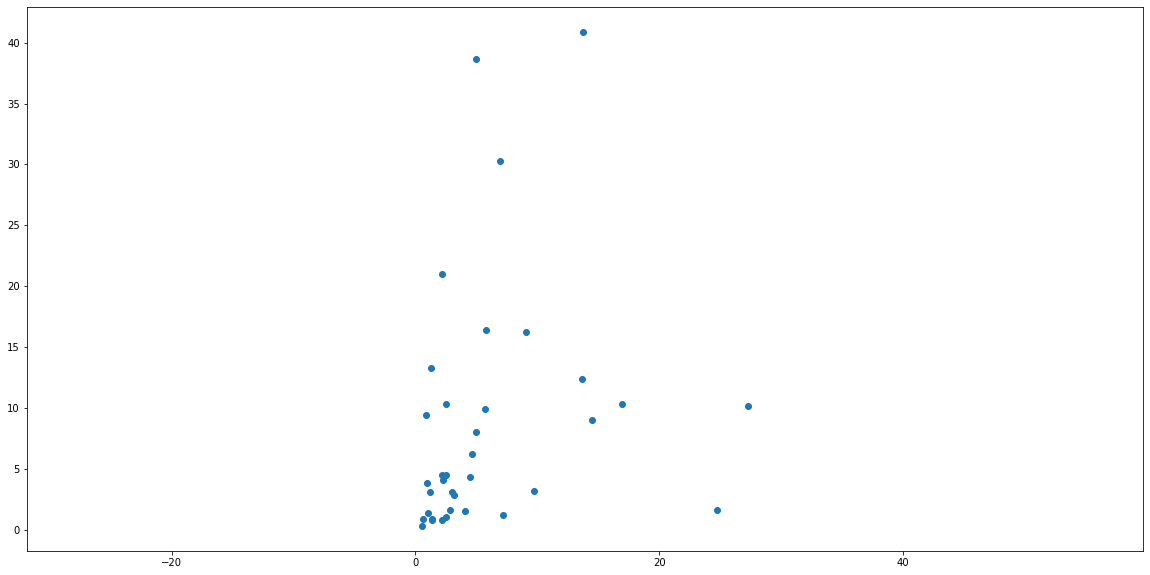

In [61]:
plt.plot(flow_emb[:,0],flow_emb[:,1],'o')
plt.axis('equal')
plt.show()

In [62]:
from sklearn.metrics import pairwise_distances

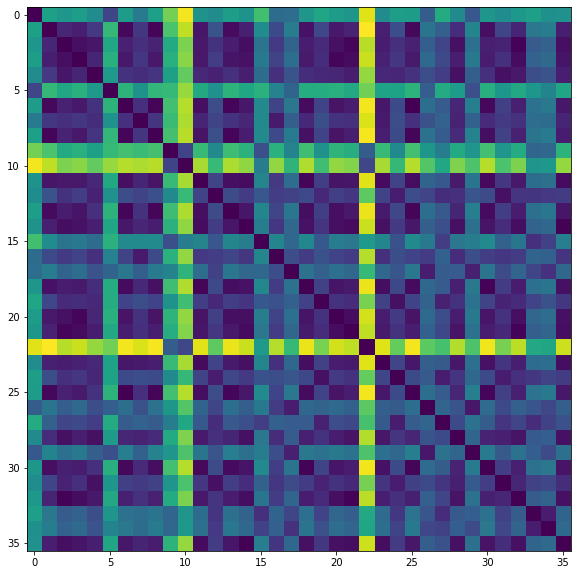

In [63]:
D = pairwise_distances(flow_emb)
plt.imshow(D)
plt.show()

In [64]:
def create_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

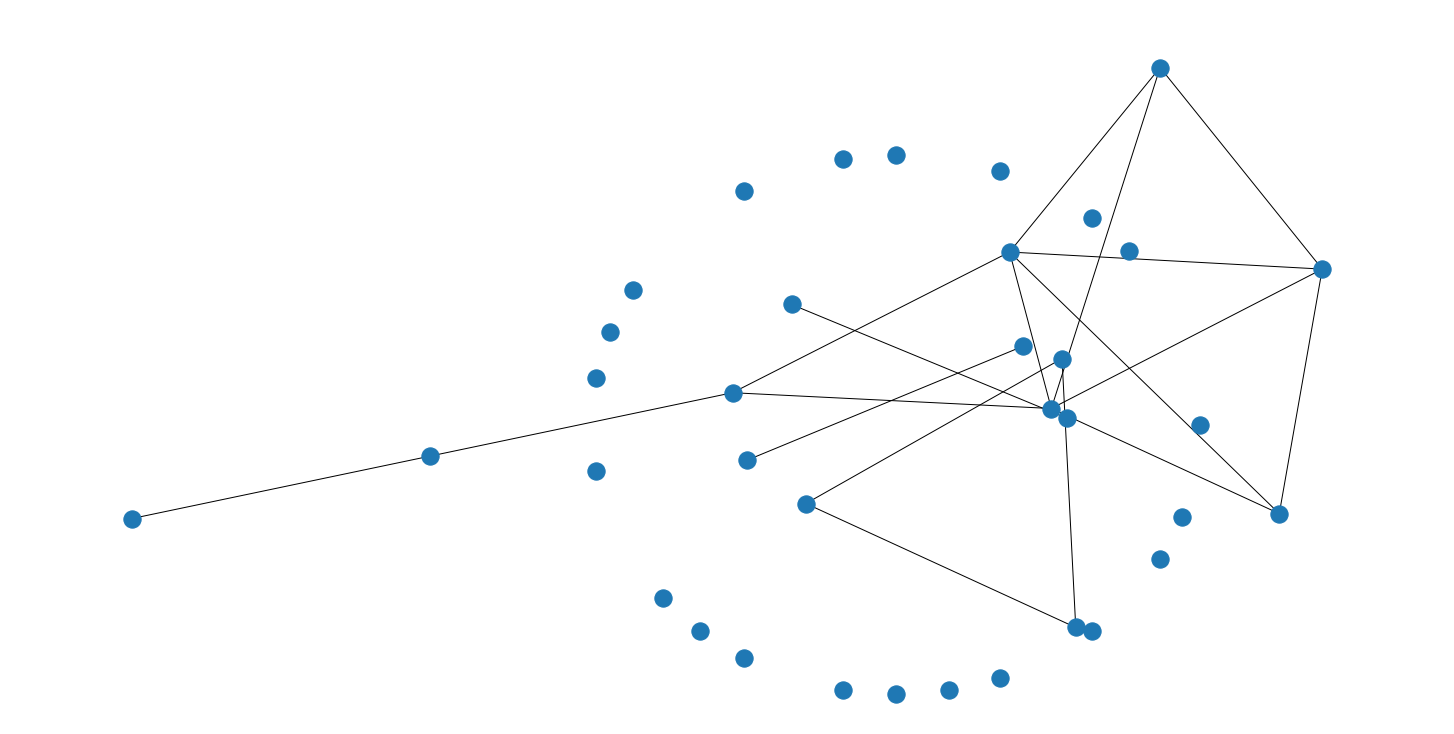

In [65]:
r = 1
G = create_simplicial_complex(D,r)
nx.draw_kamada_kawai(G)

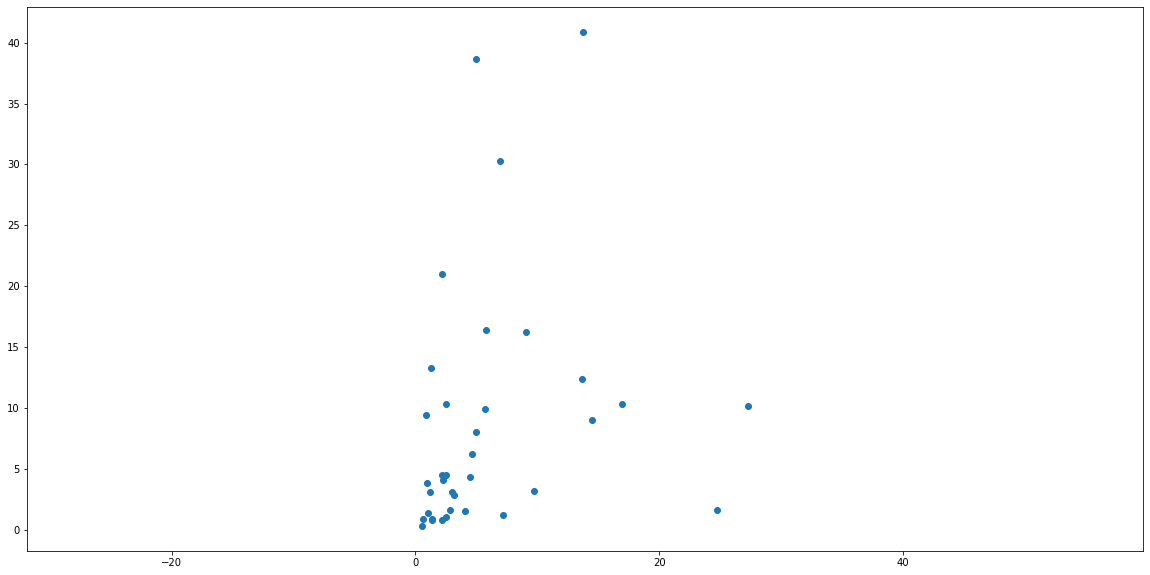

In [66]:
plt.plot(flow_emb[:,0],flow_emb[:,1],'o')
plt.axis('equal')
plt.show()

In [67]:
X = flow_emb

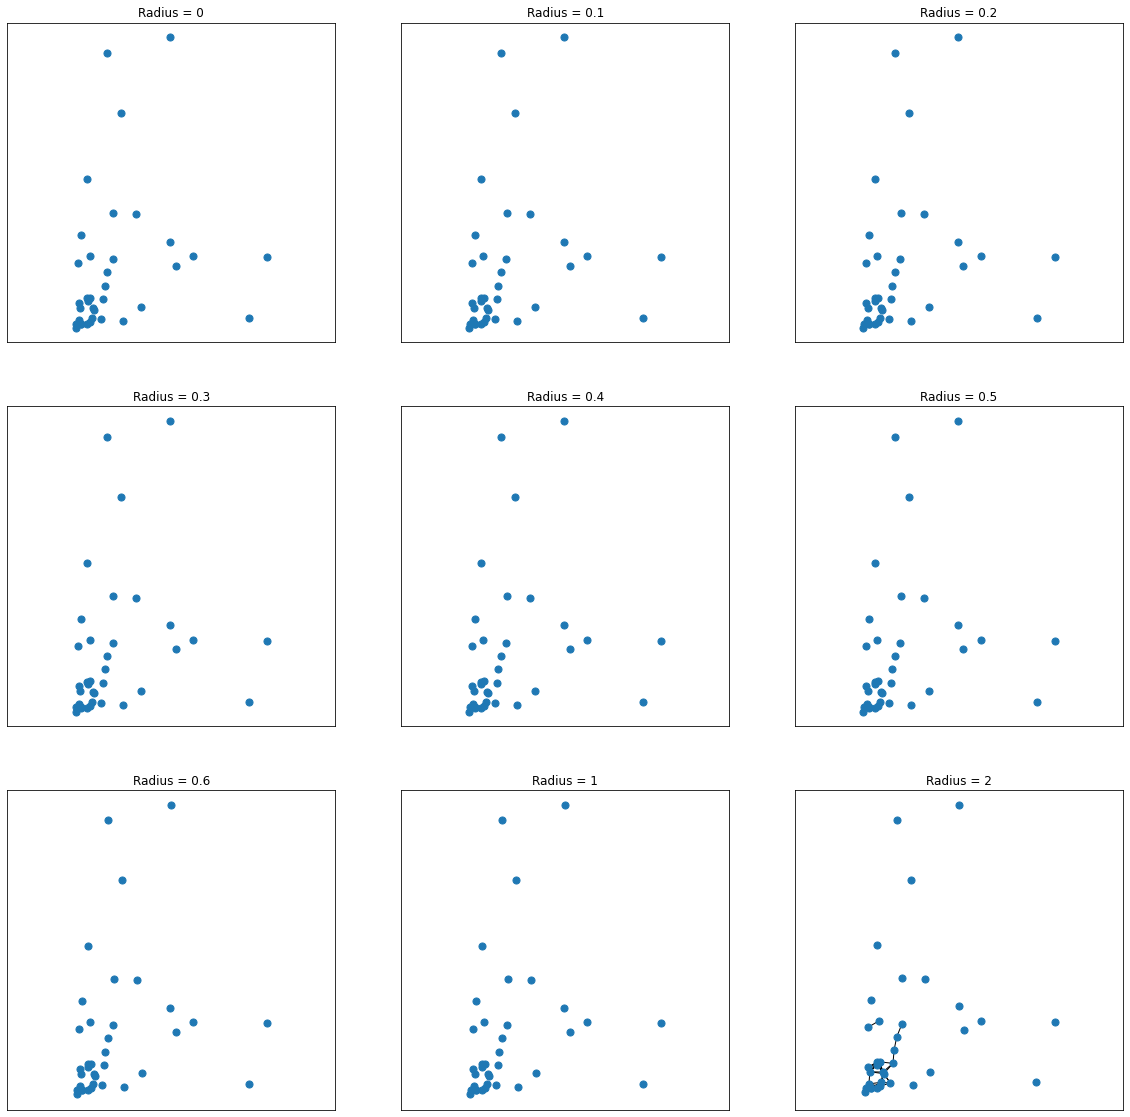

In [68]:
rs = [0,0.1,0.2,0.3,0.4,0.5,0.6,1,2]
pos = {n:X[n,:] for n in range(len(X))}

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G = create_simplicial_complex(D,r)
    plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

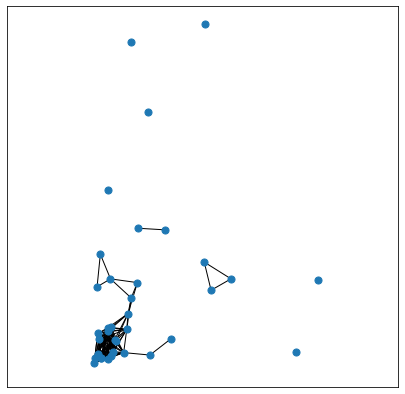

In [69]:
plt.figure(figsize = (7,7))
r = 4
G = create_simplicial_complex(D,r)
nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
plt.axis('equal')
plt.show()

In [70]:
def create_2_dim_simplicial_complex(D,r):
    
    # Create 1-skeleton
    G = create_simplicial_complex(D,r)
    
    # Get a list of 2-simplices
    two_spx_list = []
    
    # Naive search for viable 2-simplices
    for edge in G.edges():
        for vertex in G.nodes():
            if vertex != edge[0] and vertex != edge[1] and D[edge[0],vertex] < r and D[edge[1],vertex] < r:
                two_spx_list.append([edge[0],edge[1],vertex])
                
    return G, two_spx_list

In [71]:
G, two_spx_list = create_2_dim_simplicial_complex(D,r)

In [72]:
patches = []

for i,spx in enumerate(two_spx_list):
    position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
    polygon = Polygon(position_array, True)
    patches.append(polygon)

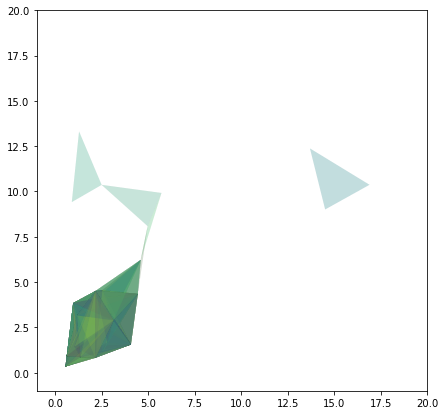

In [73]:
fig, ax = plt.subplots(figsize = (7,7))

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.1)
p.set_array(np.array(colors))
ax.add_collection(p)

plt.xlim([-1, 20])
plt.ylim([-1, 20])
plt.show()

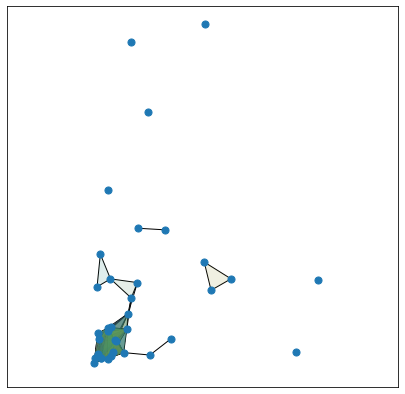

In [74]:
fig, ax = plt.subplots(figsize = (7,7))

nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.05)
p.set_array(np.array(colors))
ax.add_collection(p)

plt.axis('equal')
plt.show()

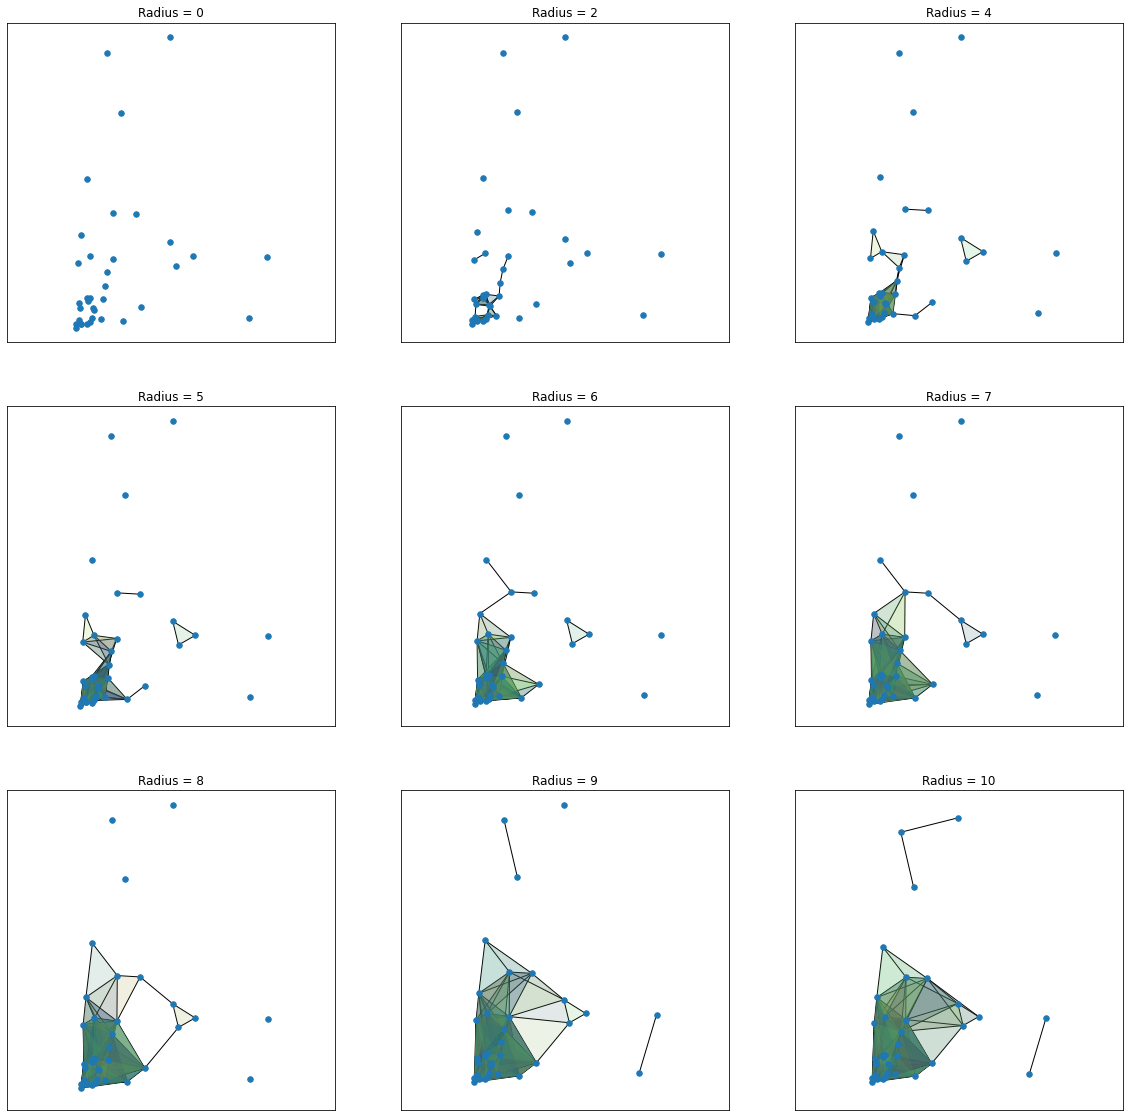

In [75]:
rs = [0,2,4,5,6,7,8,9,10]
pos = {n:X[n,:] for n in range(len(X))}

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G, two_spx_list = create_2_dim_simplicial_complex(D,r)
    patches = []

    for i,spx in enumerate(two_spx_list):
        position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
        polygon = Polygon(position_array, True)
        patches.append(polygon)
        
    ax = plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 30)
    colors = 100*np.random.rand(len(patches))
    p = PatchCollection(patches, alpha=0.05)
    p.set_array(np.array(colors))
    ax.add_collection(p)
    
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()